In [1]:
!pip install pandas
!pip install glob
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#LOAD ALL THE DATA INTO A SINGLE DATAFRAME

import pandas as pd
import glob
import csv

# Define the directory where your CSV files are, replace with your actual directory
directory_path = "/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/**/*csv"

# Get a list of all the CSV files in the directory and subdirectories
csv_files = glob.glob(directory_path, recursive=True)

# Print the list of CSV files
print("CSV Files:")
for file in csv_files:
    print(file)

# Check if any files are detected
if not csv_files:
    print("No CSV files found in the specified directory path.")
else:
    # Define a list to hold all dataframes
    dfs = []

    # Loop over the list of files
    for filename in csv_files:
        try:
            # Read the CSV file into a Pandas DataFrame using the csv module
            with open(filename, 'r') as file:
                reader = csv.reader(file)
                df = pd.DataFrame(reader)
            # Append the DataFrame to the list
            dfs.append(df)
        except csv.Error as e:
            print(f"Error reading file: {filename} ({e})")
    
    # Combine all DataFrames into one
    if dfs:
        data = pd.concat(dfs, ignore_index=True)
        # Display the first few rows of the DataFrame
        print(data.head())


CSV Files:
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/34/2_raw_data_10-53_07.04.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/34/1_raw_data_10-51_07.04.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/35/2_raw_data_10-05_13.04.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/35/1_raw_data_10-03_13.04.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/10/1_raw_data_11-08_21.03.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/10/2_raw_data_11-10_21.03.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/08/1_raw_data_12-14_23.03.16.csv
/scratch/dn2206/Batch 1 Files/UCI ML Repo 1/scripts.zip_unzipped/EMG_data_for_gestures-master/08/2_r

In [3]:
print(data.shape)


(4237980, 10)


In [4]:
#MISSING VALUES

# Check for missing values in the DataFrame
missing_values = data.isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
dtype: int64


In [5]:
# Drop rows with missing values
data.dropna(inplace=True)

# Verify no more missing values
missing_values = data.isnull().sum()
print(missing_values)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [6]:
# Define column names
column_names = ['Time', 'Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7', 'Channel 8', 'Class']

# Set the DataFrame column names
data.columns = column_names

# Convert all columns (except 'Class' column) to numeric, forcing non-numeric values to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with any NaN values
data = data.dropna()


In [7]:
data.head()

,Time,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Class
1,1.0,-0.00001,-0.00002,-0.00003,-0.00001,0.00000,0.00000,-0.00002,0.00000,0.0
2,3.0,-0.00001,-0.00002,-0.00003,-0.00001,0.00000,0.00000,-0.00002,0.00000,0.0
3,4.0,0.00003,0.00004,0.00005,0.00002,-0.00001,-0.00001,-0.00002,-0.00002,0.0
4,5.0,-0.00001,0.00000,0.00001,-0.00001,-0.00004,-0.00001,-0.00002,-0.00002,0.0
5,6.0,-0.00001,0.00000,0.00001,-0.00001,-0.00004,-0.00001,-0.00002,-0.00002,0.0


In [9]:
#SCALING/ NORMALIZATION

from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the data (excluding the last column)
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

# Check the transformed data
print(data.head())



   Channel 1  Channel 2  Channel 3  Channel 4  Channel 5  Channel 6  \
1   0.498039   0.494118   0.490196   0.498039   0.501961   0.501961   
2   0.498039   0.494118   0.490196   0.498039   0.501961   0.501961   
3   0.513725   0.517647   0.521569   0.509804   0.498039   0.498039   
4   0.498039   0.501961   0.505882   0.498039   0.486275   0.498039   
5   0.498039   0.501961   0.505882   0.498039   0.486275   0.498039   

   Channel 7  Channel 8  Class  
1   0.494118   0.501961    0.0  
2   0.494118   0.501961    0.0  
3   0.494118   0.494118    0.0  
4   0.494118   0.494118    0.0  
5   0.494118   0.494118    0.0  


In [10]:
data.shape

(4237907, 9)

          Channel 1     Channel 2     Channel 3     Channel 4     Channel 5  \
count  4.237907e+06  4.237907e+06  4.237907e+06  4.237907e+06  4.237907e+06   
mean   4.988582e-01  4.982682e-01  4.982162e-01  4.981812e-01  4.956874e-01   
std    6.396512e-02  4.675406e-02  4.869986e-02  8.853837e-02  1.068309e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.901961e-01  4.862745e-01  4.862745e-01  4.784314e-01  4.705882e-01   
50%    4.980392e-01  4.980392e-01  4.980392e-01  4.980392e-01  4.980392e-01   
75%    5.098039e-01  5.098039e-01  5.137255e-01  5.176471e-01  5.215686e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          Channel 6     Channel 7     Channel 8         Class  
count  4.237907e+06  4.237907e+06  4.237907e+06  4.237907e+06  
mean   4.977038e-01  4.982884e-01  4.981581e-01  1.265671e+00  
std    8.436884e-02  5.989455e-02  6.748759e-02  1.989693e+00  
min    0.000000e+00  0.000000e+0

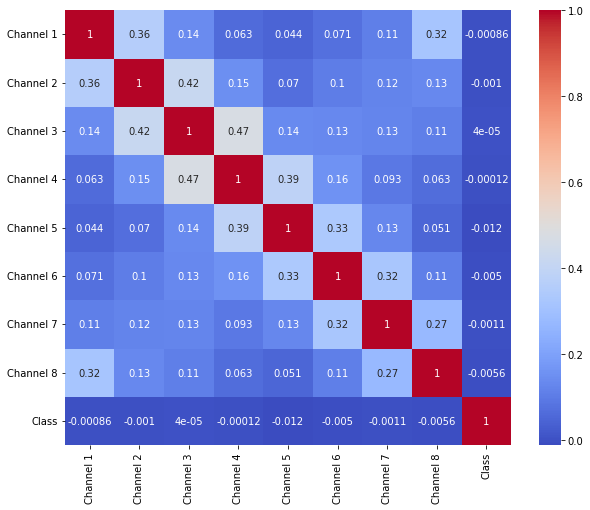

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

# Pairplot to visualize relationships and distributions
sns.pairplot(data, hue="Class")
plt.show()


In [12]:
#DATA SPLITTING


from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1] #all columns except the last one
y = data.iloc[:, -1] #only the last column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#SVM Model

from sklearn import svm
from sklearn.metrics import accuracy_score

# Create a SVM classifier
clf = svm.SVC(kernel='linear')

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy: ', accuracy)




In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
#k_NN:


from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN Accuracy: ', accuracy)
print (classification_report(y_test, y_pred))


In [ ]:
#Linear Regression:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE: ', mse)


In [ ]:
#Simple Neural Net

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Neural Network Accuracy: ', accuracy)


In [ ]:
#Random Forest:


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy: ', accuracy)

In [ ]:
# Gradient Boosting


from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting Accuracy: ', accuracy)


In [ ]:
# Logistic Regression


lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy: ', accuracy)

In [ ]:
#Data Visualization using PCA (Principal Component Analysis)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' is the DataFrame containing your EMG data
X = data.iloc[:, :-1] #all columns except the last one
y = data.iloc[:, -1] #only the last column

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
